<a href="https://colab.research.google.com/github/mnocerino23/NBA-Player-Classifier/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this notebook we experiment with Decision Trees to decide who does and does not deserve a max contract

In [ ]:
import pandas as pd
import sklearn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
complete = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/complete22-23.csv')

In [ ]:
complete.head(4)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST_TOV,OWS_div_USG,TS_times_USG,bigmanD,foul_rate,three_rate,PTs_per_36,PF_per_dplay,FG_TOV,two_way
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.818182,0.041237,10.7476,0.251208,0.091787,21.505376,16.000000,1.727273,3.727273,38.690909
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,1.210526,0.089041,8.2344,0.314815,0.085185,0.000000,11.466667,1.150000,1.947368,87.500000
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,1.280000,0.142857,14.9184,0.251445,0.080925,1.324503,21.225434,1.400000,3.200000,101.840000
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,1.571429,0.056962,8.8638,0.092683,0.082927,37.500000,13.873171,2.833333,6.000000,6.440678


In [ ]:
#note that some players have multiple positions
complete['Pos'].unique()

array(['C', 'SG', 'PF', 'PG', 'SF', 'PF-SF', 'SF-SG', 'SG-PG'],
      dtype=object)

In [ ]:
#we want to make sure each player has only one position to limit the amount of categories for Pos.
#although we don't need to one hot encode for our tree based model, limiting all 
#entries to just one position is still important

for index, rows in complete.iterrows():
  #if the position has length greater than two (meaning it isn't C, PG, SG, SF, or PF), we shorten it to the first position
  if len(complete.at[index, 'Pos']) > 2:
    complete.at[index, 'Pos'] = complete.at[index, 'Pos'][:2]

# Players with salaries over 25 million will be considered max level players while those under with be considered "Not max"

In [ ]:
#use a lambda function to assign classes
complete['Class'] = complete['Salary'].apply(lambda x: 'Max' if x > 25 else 'Not Max')

In [ ]:
#the count of each class in the dataset before splitting
complete['Class'].value_counts()

Not Max    398
Max         52
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#split into input features and target variable class
X = complete.drop(columns = ['Salary'], axis = 1)
y = complete['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.2, shuffle = True)

In [ ]:
X_train.loc[X_train['Class'] == 'Max']['Player']

373              Ben Simmons
389             Jayson Tatum
253               Kevin Love
334       Michael Porter Jr.
394            Klay Thompson
150           Draymond Green
115             Kevin Durant
297             Jamal Murray
10     Giannis Antetokounmpo
195           Brandon Ingram
92             Anthony Davis
46              Devin Booker
58              Jaylen Brown
432           Andrew Wiggins
403             Myles Turner
61             Jalen Brunson
163             James Harden
199        Jaren Jackson Jr.
2                Bam Adebayo
211             Nikola Jokić
246           Damian Lillard
448               Trae Young
97             DeMar DeRozan
282          Khris Middleton
417                John Wall
196             Kyrie Irving
372            Pascal Siakam
130             De'Aaron Fox
143              Rudy Gobert
202             LeBron James
121              Joel Embiid
271              CJ McCollum
336       Kristaps Porziņģis
169            Tobias Harris
243           

In [ ]:
#need to remove kyle lowry, john wall, Gordon Hayward, Ben Simmons from the training sert

In [ ]:
print(list(X_test['Player']))

['Donovan Mitchell', 'Khem Birch', 'Kevin Porter Jr.', 'Naji Marshall', 'Luke Kennard', 'R.J. Hampton', 'Isaiah Jackson', 'Justin Holiday', 'Jaden Ivey', 'Jarred Vanderbilt', 'Kennedy Chandler', 'Kevon Harris', 'Shaedon Sharpe', 'Jevon Carter', 'Ricky Rubio', 'Kyle Kuzma', 'Jeff Dowtin', 'Derrick Rose', 'Richaun Holmes', 'Bradley Beal', 'McKinley Wright IV', 'Jabari Walker', 'Aaron Holiday', 'Paul George', 'Mikal Bridges', 'Moussa Diabaté', 'Bogdan Bogdanović', 'Justise Winslow', 'Blake Griffin', 'Dejounte Murray', 'Javonte Green', 'Alperen Şengün', 'Bruno Fernando', 'Josh Okogie', 'Ivica Zubac', 'Malaki Branham', 'Tim Hardaway Jr.', 'Lamar Stevens', 'Mo Bamba', 'Derrick Jones Jr.', 'Wenyen Gabriel', 'Markieff Morris', 'Russell Westbrook', 'Tre Mann', 'Shai Gilgeous-Alexander', 'Kevin Knox', 'Tyrese Maxey', 'Frank Ntilikina', 'Trey Murphy III', 'Duane Washington Jr.', 'Killian Hayes', 'Bruce Brown', 'T.J. Warren', 'John Butler', 'Al Horford', 'Mike Muscala', 'Matisse Thybulle', 'Cory J

In [ ]:
#drop the names column before proceeding
names_train = list(X_train['Player'])
X_train.drop(columns = ['Player', 'Pos', 'Tm'], axis = 1, inplace = True)
names_test = list(X_test['Player'])
X_test.drop(columns = ['Player', 'Pos', 'Tm'], axis = 1, inplace = True)

In [ ]:
print('Train:')
print('train_features dimensions: ', X_train.shape)
print('train_target dimensions: ', y_train.shape, '\n')


print('Test:')
print('test_features dimensions: ', X_test.shape)
print('test_target dimensions: ', y_test.shape)

Train:
train_features dimensions:  (382, 59)
train_target dimensions:  (382,) 

Test:
test_features dimensions:  (68, 59)
test_target dimensions:  (68,)


In [ ]:
import sklearn
from sklearn import tree

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn

In [ ]:
#use a max_depth of 3 for this decision tree to avoid overfitting the data
dt = tree.DecisionTreeClassifier(random_state= 5, max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
class_predicted = dt.predict(X_test)

# Create a dataframe predictions

In [ ]:
predictions = pd.DataFrame({'Name': names_test, 'Real label': y_test, 'Prediction': class_predicted})

In [ ]:
print("Correct Predictions: ")
for index, rows in predictions.iterrows():
  if predictions.at[index, 'Real label'] == predictions.at[index, 'Prediction']:
    print(predictions.at[index, 'Name'], '-', predictions.at[index,'Real label'])

Correct Predictions: 
Donovan Mitchell - Max
Khem Birch - Not Max
Kevin Porter Jr. - Not Max
Naji Marshall - Not Max
Luke Kennard - Not Max
R.J. Hampton - Not Max
Isaiah Jackson - Not Max
Justin Holiday - Not Max
Jarred Vanderbilt - Not Max
Kennedy Chandler - Not Max
Kevon Harris - Not Max
Shaedon Sharpe - Not Max
Jevon Carter - Not Max
Ricky Rubio - Not Max
Kyle Kuzma - Not Max
Jeff Dowtin - Not Max
Derrick Rose - Not Max
Richaun Holmes - Not Max
McKinley Wright IV - Not Max
Jabari Walker - Not Max
Aaron Holiday - Not Max
Paul George - Max
Moussa Diabaté - Not Max
Bogdan Bogdanović - Not Max
Justise Winslow - Not Max
Blake Griffin - Not Max
Javonte Green - Not Max
Alperen Şengün - Not Max
Bruno Fernando - Not Max
Josh Okogie - Not Max
Ivica Zubac - Not Max
Malaki Branham - Not Max
Tim Hardaway Jr. - Not Max
Lamar Stevens - Not Max
Mo Bamba - Not Max
Derrick Jones Jr. - Not Max
Wenyen Gabriel - Not Max
Markieff Morris - Not Max
Tre Mann - Not Max
Shai Gilgeous-Alexander - Max
Kevin Kno

# Dataframe showing the models missed predictions (where the model disagrees with true label)

In [ ]:
predictions.loc[predictions['Real label'] != predictions['Prediction']].reset_index(drop = True)

,Name,Real label,Prediction
0,Jaden Ivey,Not Max,Max
1,Bradley Beal,Max,Not Max
2,Mikal Bridges,Not Max,Max
3,Dejounte Murray,Not Max,Max
4,Russell Westbrook,Max,Not Max
5,Tyrese Maxey,Not Max,Max
6,Al Horford,Max,Not Max


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
print("Accuracy: ", accuracy_score(class_predicted, y_test))
#print("F1: ", f1_score(class_predicted, y_test))
#print("Precision: ", precision_score(class_predicted, y_test))
#print("Recall: ", recall_score(class_predicted, y_test))

Accuracy:  0.8970588235294118


# Confusion matrix for the model's performance on the test data

[[ 3  3]
 [ 4 58]]


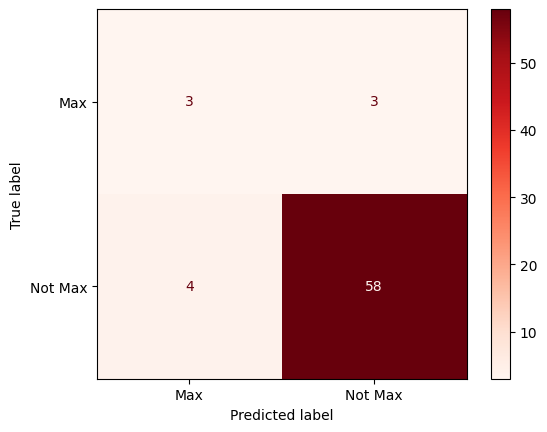

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt,
        X_test,
        y_test,
        cmap=plt.cm.Reds,
    )

print(disp.confusion_matrix)

# Investigate how the model learned on the training data we provided

In [ ]:
class_pred = dt.predict(X_train)

In [ ]:
predictions2 = pd.DataFrame({'Name': names_train, 'Real label': y_train, 'Prediction': class_pred})

In [ ]:
predictions2.loc[predictions2['Real label'] != predictions2['Prediction']]

,Name,Real label,Prediction
441,Zion Williamson,Not Max,Max
261,Lauri Markkanen,Not Max,Max
253,Kevin Love,Max,Not Max
407,Devin Vassell,Not Max,Max
342,Julius Randle,Not Max,Max
134,Darius Garland,Not Max,Max
23,Desmond Bane,Not Max,Max
291,Ja Morant,Not Max,Max
417,John Wall,Max,Not Max
169,Tobias Harris,Max,Not Max


# Print the 41 players deserving of the max as identified by the model

In [ ]:
predictions2.loc[(predictions2['Real label'] == 'Max') & (predictions2['Prediction'] == 'Max')]

,Name,Real label,Prediction
90,Stephen Curry,Max,Max
373,Ben Simmons,Max,Max
389,Jayson Tatum,Max,Max
334,Michael Porter Jr.,Max,Max
394,Klay Thompson,Max,Max
150,Draymond Green,Max,Max
115,Kevin Durant,Max,Max
297,Jamal Murray,Max,Max
10,Giannis Antetokounmpo,Max,Max
195,Brandon Ingram,Max,Max


[[ 41   5]
 [  9 327]]


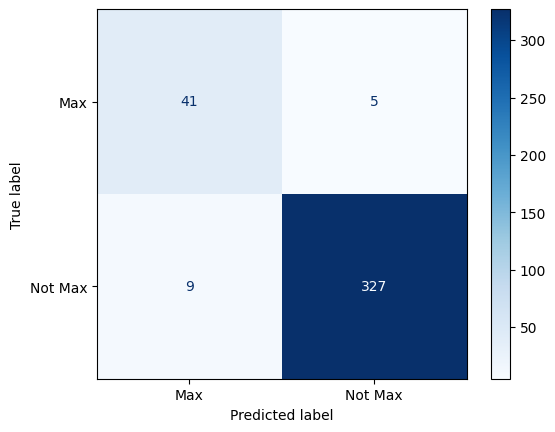

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt,
        X_train,
        y_train,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

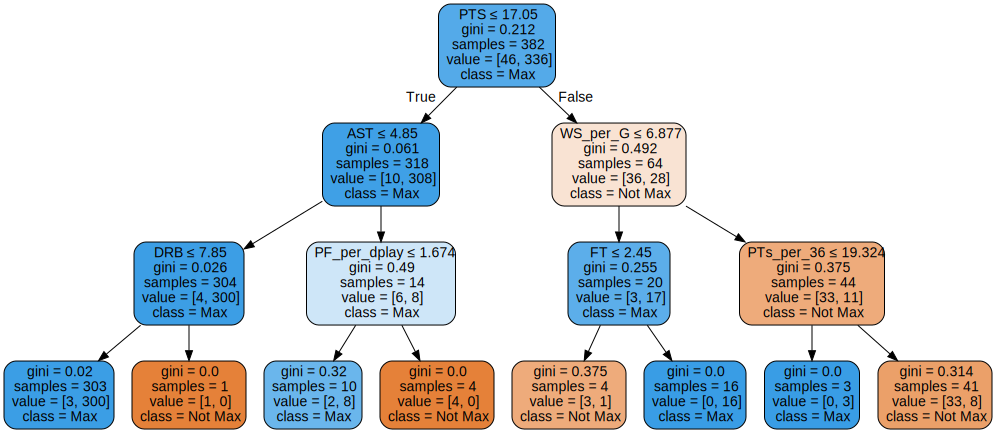

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


graphic = export_graphviz(dt, out_file=None, 
                           feature_names=X_train.columns, class_names=y_train.unique(), 
                           filled=True, rounded=True, special_characters=True)

# Render the GraphViz object as an image
graph = graphviz.Source(graphic)
display(graph)